In [1]:
import numpy as np
import h5py
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
H5_FILE = 'data/ptb_xl/processed/dataset.h5'

In [4]:
hf = h5py.File(H5_FILE, 'r')

In [5]:
hf.keys()

<KeysViewHDF5 ['ecg_data', 'is_labeled', 'label_subclass', 'label_superclass', 'strat_fold']>

In [6]:
ecg_data = np.asarray(hf['ecg_data'])
label_superclass = np.asarray(hf['label_superclass'])
label_subclass = np.asarray(hf['label_subclass'])
strat_fold = np.asarray(hf['strat_fold'])

In [7]:
hf.close()

In [8]:
print('ecg_data')
print(ecg_data.shape)

ecg_data
(21799, 1000, 12)


In [9]:
ecg_data = ecg_data.reshape(-1, 12)
print('ecg_data')
print(ecg_data)
print(ecg_data.shape)

ecg_data
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.091  0.012 -0.079 ...  0.063  0.016 -0.117]
 [ 0.175  0.022 -0.153 ...  0.08   0.018 -0.108]
 [ 0.166 -0.007 -0.173 ...  0.106  0.047 -0.103]]
(21799000, 12)


In [10]:
mean = np.mean(ecg_data, axis=0)
print('mean')
print(mean.tolist())
print(mean.shape)

mean
[-0.0015939727891236544, -0.0013031433336436749, 0.00029035151237621903, 0.0014302238123491406, -0.0008918124949559569, -0.00048305661766789854, 0.00017116559320129454, -0.0009138658060692251, -0.001489124959334731, -0.0017458670772612095, -0.0007674962398596108, -0.0020748174283653498]
(12,)


In [11]:
std = np.std(ecg_data, axis=0)
print('std')
print(std.tolist())
print(std.shape)

std
[0.1553376317024231, 0.15989091992378235, 0.16283635795116425, 0.1345466524362564, 0.13730694353580475, 0.14131711423397064, 0.22873035073280334, 0.33088698983192444, 0.32615572214126587, 0.29820892214775085, 0.26580968499183655, 0.27013346552848816]
(12,)


In [12]:
print('label_superclass')
print(label_superclass)
print(label_superclass.shape)

label_superclass
[[1.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]
 ...
 [0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]
(21799, 5)


In [13]:
print('label_subclass')
print(label_subclass)
print(label_subclass.shape)

label_subclass
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(21799, 23)


In [14]:
def num_labels_per_sample(vector):
    # count the values >= 0.5
    return np.sum(vector >= 0.5)

In [15]:
num_labels_per_sample(label_subclass[0])

np.int64(1)

In [16]:
num_labels_per_sample_superclass = np.apply_along_axis(num_labels_per_sample, 1, label_superclass)
num_labels_per_sample_subclass = np.apply_along_axis(num_labels_per_sample, 1, label_subclass)

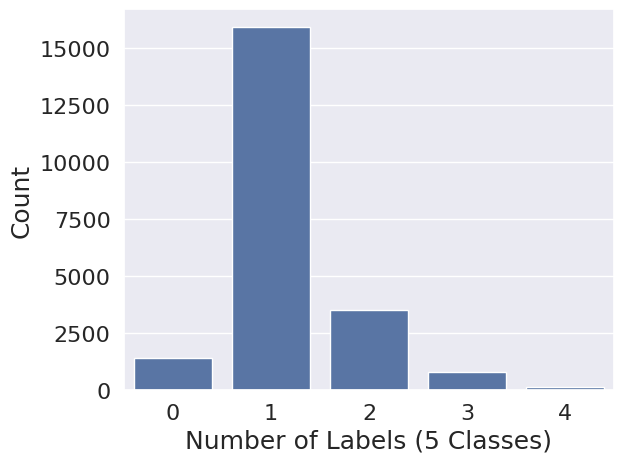

In [17]:
fig1, ax1 = plt.subplots(1, 1)
sns.countplot(x=num_labels_per_sample_superclass, ax=ax1)
ax1.set_xlabel('Number of Labels (5 Classes)', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(axis='both', which='major', width=2, labelsize=16)
fig1.tight_layout()
plt.show()

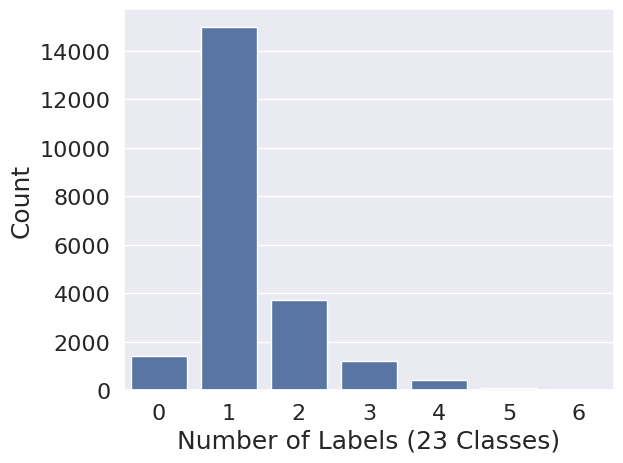

In [18]:
fig2, ax2 = plt.subplots(1, 1)
sns.countplot(x=num_labels_per_sample_subclass, ax=ax2)
ax2.set_xlabel('Number of Labels (23 Classes)', fontsize=18)
ax2.set_ylabel('Count', fontsize=18)
ax2.tick_params(axis='both', which='major', width=2, labelsize=16)
fig2.tight_layout()
plt.show()

In [19]:
np.unique(strat_fold, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([2175, 2181, 2192, 2174, 2174, 2173, 2176, 2173, 2183, 2198]))